KNN (K Nearest Neighbor) is normally used as Classifier algorithm.

This algorithm is used in the case the Target variable is mostly balanced.

Here K denotes the neighbor count and based on the number of Neigbors defined for the new entrant, the most popular on voting (between the categories and their distance) are chosen as the category for the entrant.

In KNN there are various parameters defined while instantiating the algorithm. Important of of them is the metric, which is used to calculate the distance between the items


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1= pd.read_csv('datasets_56485_108594_Breast_cancer_data.csv')

In [4]:
df1.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


Observation 1:
  Data looks to be al Numeric
  All data are available and not any is missing
  For a quick check, checking the mean and max values, to see if max is twice the mean - means the distribution is normal (its always better to have distplot for finer details)
  Apart from mean_area, rest features are closely normal distributed. mean_area looks right skewed  

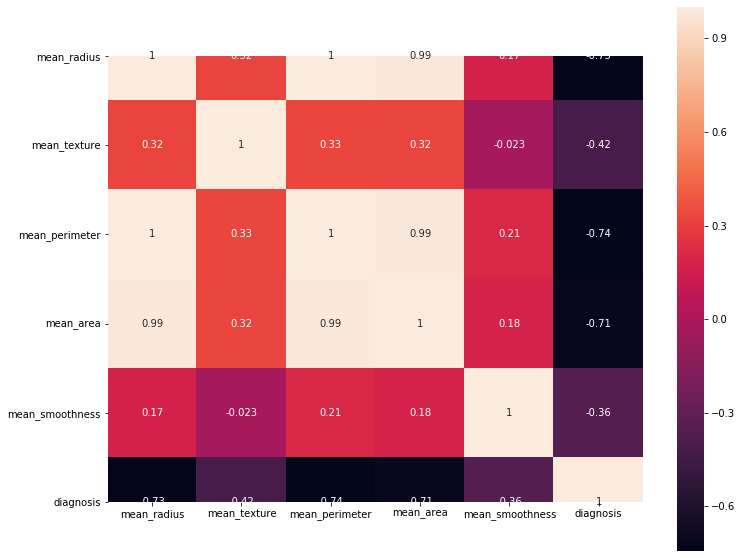

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True, square=True)

Observation 2:
    mean_perimter is strongly correlated with mean_radius (100%)
    Also mean_perimeter is strongly correlated with mean_area(99%)
    So we can retain mean_radius and drop mean_perimter and mean_area as both are calcuative of the mean_radius

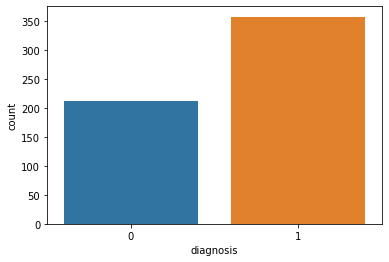

In [8]:
sns.countplot(df1['diagnosis'])

In [11]:
df1['diagnosis'].value_counts()/len(df1['diagnosis'])*100

1    62.741652
0    37.258348
Name: diagnosis, dtype: float64

The data is not poorly imbalanced though fairly they are 63:37
We shall deal with this later using other approaches

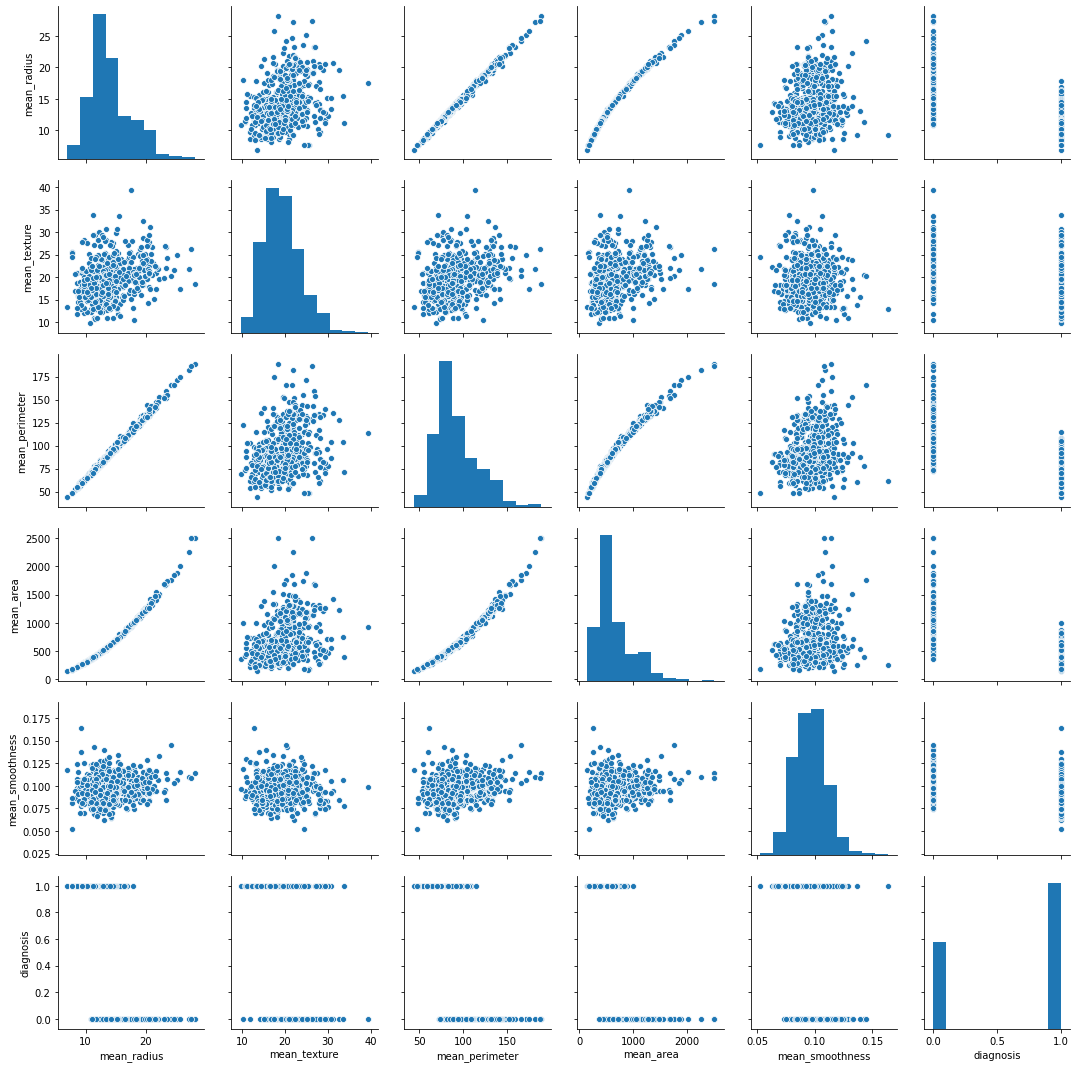

In [10]:
sns.pairplot(df1)

This confirms our views that most of the data are normally distributed, except mean_area which is right skewed
As we have already planned to drop mean_area and mean_perimeter - this need not be transformed

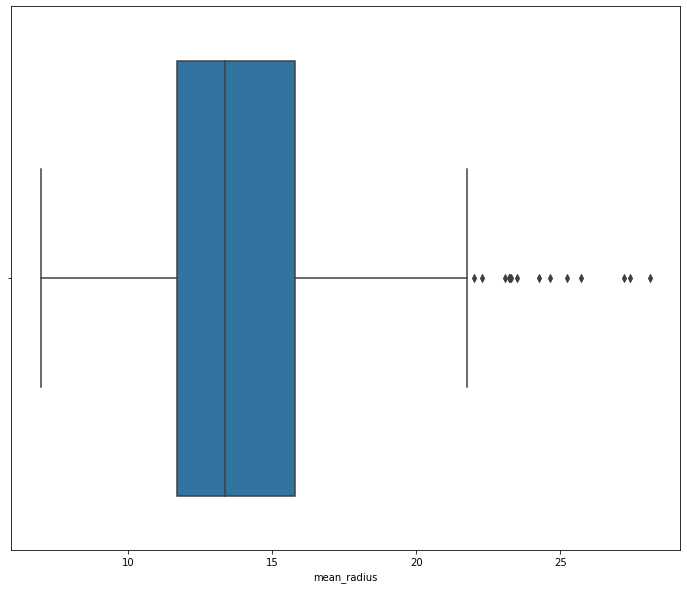

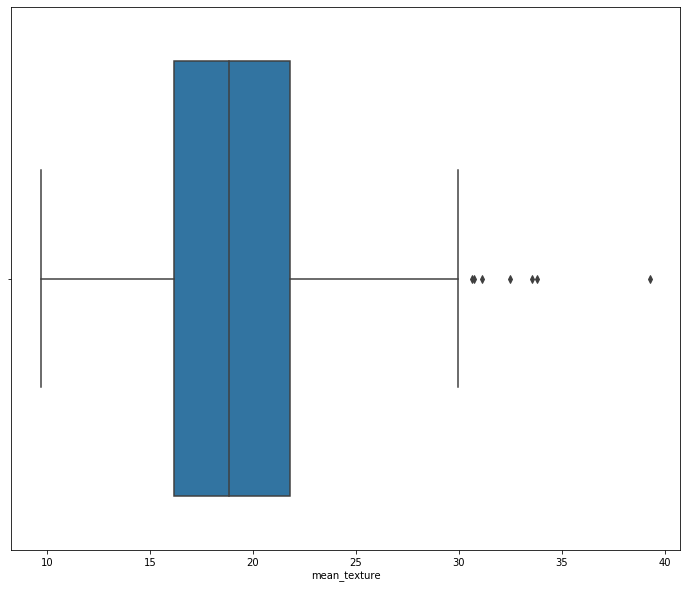

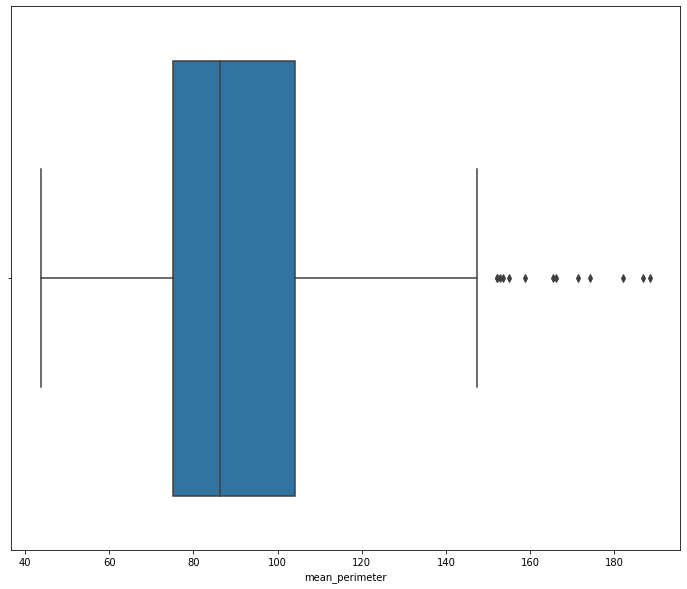

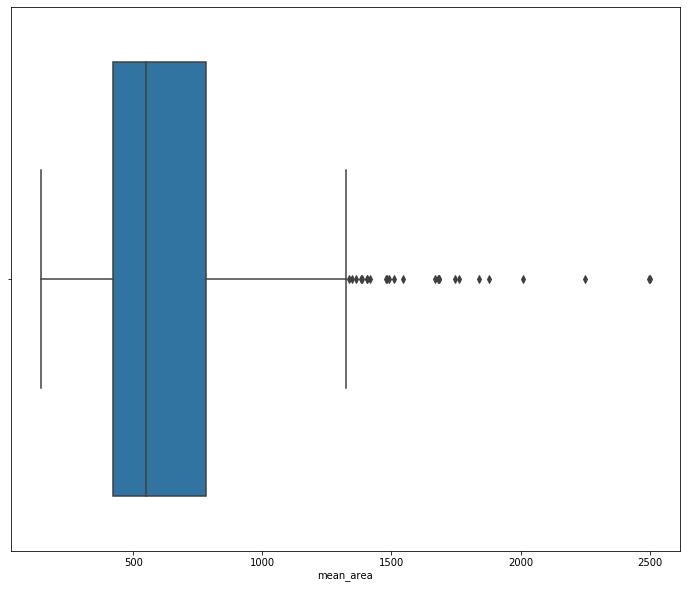

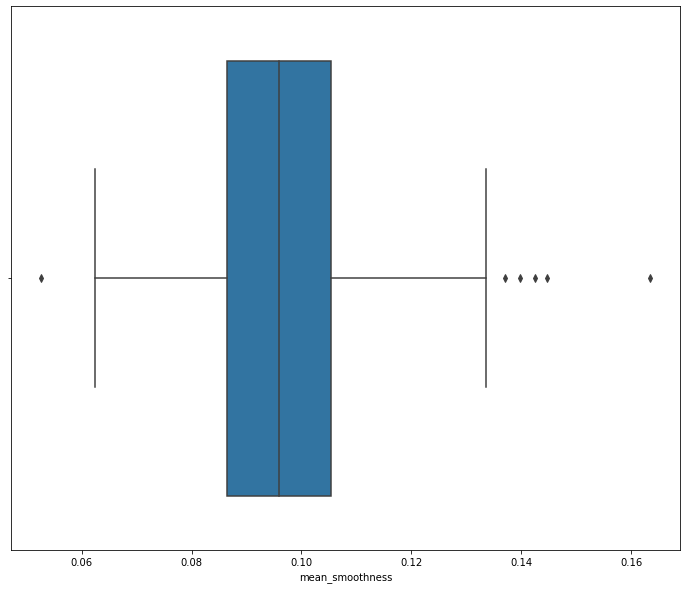

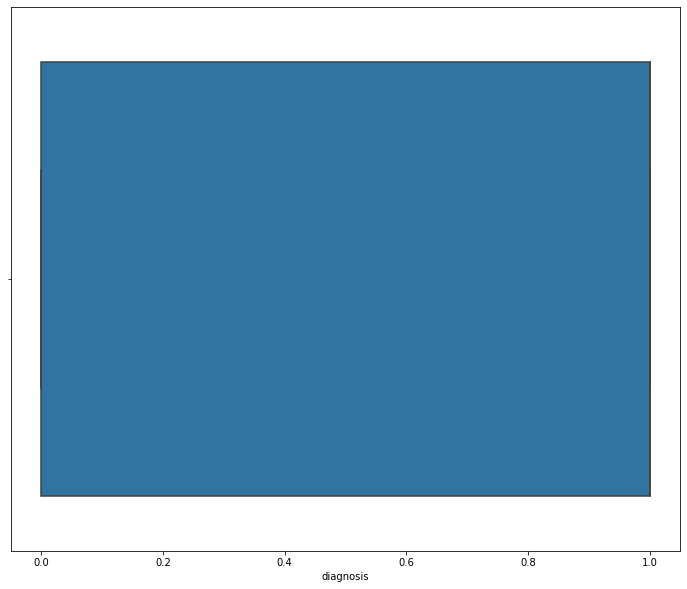

In [12]:
for i in df1.columns:
    plt.figure(figsize=(12,10))
    sns.boxplot(df1[i])

In [17]:
#There are limted outliers, so not treating them now

In [13]:
df1.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [15]:
df1 = df1[['mean_radius','mean_texture','mean_smoothness','mean_perimeter','mean_area','diagnosis']]

In [19]:
from sklearn.preprocessing import StandardScaler
std_scale= StandardScaler()
X = std_scale.fit_transform(df1.drop(['mean_area','mean_perimeter','diagnosis'], axis=1))
y = df1['diagnosis']

In [20]:
X_data = pd.DataFrame(X, columns=df1.columns[:-3])

In [22]:
X_data.head()

,mean_radius,mean_texture,mean_smoothness
0,1.097064,-2.073335,1.568466
1,1.829821,-0.353632,-0.826962
2,1.579888,0.456187,0.942210
3,-0.768909,0.253732,3.283553
4,1.750297,-1.151816,0.280372


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_data, y, test_size=0.3)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 46  11]
 [  3 111]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        57
           1       0.91      0.97      0.94       114

    accuracy                           0.92       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.92      0.92      0.92       171



In [26]:
error_plt=[]
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    error_plt.append(np.mean(y_pred !=y_test))

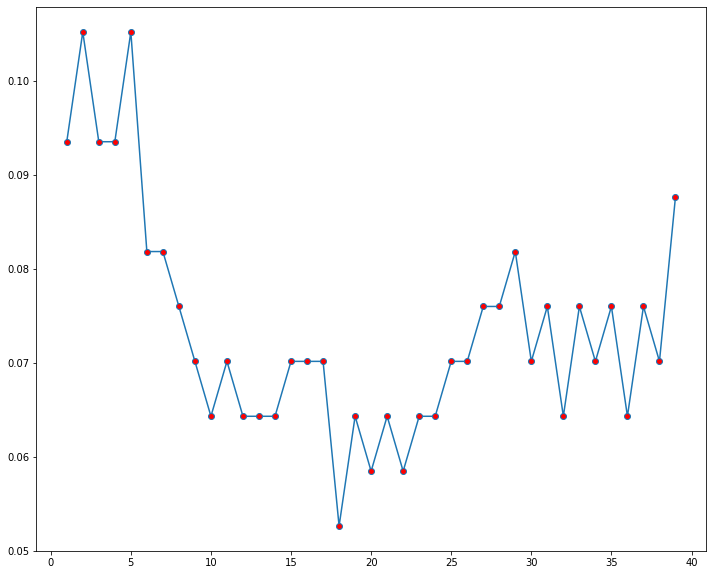

In [31]:
plt.figure(figsize=(12,10))
plt.plot(range(1,40), error_plt,marker='o', markerfacecolor='red')

In [27]:
knn1= KNeighborsClassifier(n_neighbors=18)
knn1.fit(X_train, y_train)
y1_pred=knn1.predict(X_test)

In [28]:
print(confusion_matrix(y_test, y1_pred))
print(classification_report(y_test,y1_pred))

[[ 48   9]
 [  3 111]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        57
           1       0.93      0.97      0.95       114

    accuracy                           0.93       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



Naive Bayes is the first and easy approach on any Clasification Analysis. This works on the assumption of independence of predictors
Though this is the easy method for classification, the result is purely based on the Probability of the Class (ie., category)

In [29]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y2_pred=gnb.predict(X_test)

In [31]:
print('Accuracy report for GNB ',accuracy_score(y_test, y2_pred) )
print('Confusion Matrix  ', confusion_matrix(y_test, y2_pred))
print('Classification Report  ',classification_report(y_test,y2_pred))

Accuracy report for GNB  0.9005847953216374
Confusion Matrix   [[ 42  15]
 [  2 112]]
Classification Report                 precision    recall  f1-score   support

           0       0.95      0.74      0.83        57
           1       0.88      0.98      0.93       114

    accuracy                           0.90       171
   macro avg       0.92      0.86      0.88       171
weighted avg       0.91      0.90      0.90       171



In [70]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
def random_forest(train, test, y_train, _test, n_estimators = 10, max_depth = 20, min_samples_split = 2, random_state=42):
    rfc = RandomForestClassifier(n_estimators=n_estimators,max_depth=20, min_samples_split=2,random_state=42)
    rfc.fit(X_train, y_train)
    y3_pred=rfc.predict(X_test)
    print('Estimator count   ',n_estimators)
    print('Minimum Samples Split   ',min_samples_split)
    print(accuracy_score(y_test, y3_pred))
    print(confusion_matrix(y_test, y3_pred))
    print(' ')
    print(' ')
    print('*****************')

In [71]:
for i in range(2,100,5):
    for j in range(2,10,2):
        random_forest(X_train, X_test, y_train, y_test, n_estimators=i, max_depth=20, min_samples_split=j, random_state=42)

Estimator count    2
Minimum Samples Split    2
0.8070175438596491
[[47 10]
 [23 91]]
 
 
*****************
Estimator count    2
Minimum Samples Split    4
0.8070175438596491
[[47 10]
 [23 91]]
 
 
*****************
Estimator count    2
Minimum Samples Split    6
0.8070175438596491
[[47 10]
 [23 91]]
 
 
*****************
Estimator count    2
Minimum Samples Split    8
0.8070175438596491
[[47 10]
 [23 91]]
 
 
*****************
Estimator count    7
Minimum Samples Split    2
0.9064327485380117
[[ 45  12]
 [  4 110]]
 
 
*****************
Estimator count    7
Minimum Samples Split    4
0.9064327485380117
[[ 45  12]
 [  4 110]]
 
 
*****************
Estimator count    7
Minimum Samples Split    6
0.9064327485380117
[[ 45  12]
 [  4 110]]
 
 
*****************
Estimator count    7
Minimum Samples Split    8
0.9064327485380117
[[ 45  12]
 [  4 110]]
 
 
*****************
Estimator count    12
Minimum Samples Split    2
0.9005847953216374
[[ 47  10]
 [  7 107]]
 
 
*****************
Estimat

Minimum Samples Split    4
0.9122807017543859
[[ 47  10]
 [  5 109]]
 
 
*****************
Estimator count    92
Minimum Samples Split    6
0.9122807017543859
[[ 47  10]
 [  5 109]]
 
 
*****************
Estimator count    92
Minimum Samples Split    8
0.9122807017543859
[[ 47  10]
 [  5 109]]
 
 
*****************
Estimator count    97
Minimum Samples Split    2
0.9122807017543859
[[ 47  10]
 [  5 109]]
 
 
*****************
Estimator count    97
Minimum Samples Split    4
0.9122807017543859
[[ 47  10]
 [  5 109]]
 
 
*****************
Estimator count    97
Minimum Samples Split    6
0.9122807017543859
[[ 47  10]
 [  5 109]]
 
 
*****************
Estimator count    97
Minimum Samples Split    8
0.9122807017543859
[[ 47  10]
 [  5 109]]
 
 
*****************


In [75]:
rfc_new = RandomForestClassifier(n_estimators=88,max_depth=20, min_samples_split=8,random_state=42 )
rfc_new.fit(X_train, y_train)
y6_pred=rfc_new.predict(X_test)
print(accuracy_score(y_test, y6_pred))
print(confusion_matrix(y_test, y6_pred))

0.9181286549707602
[[ 47  10]
 [  4 110]]


Observation:
n_estimators=88 is the point when we have the max depth of error rate (ie., peak of accuracy rate)
Hence we pick estimators as 67 and min_samples_split is 8

In [72]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y4_pred = logReg.predict(X_test)
print(accuracy_score(y_test, y4_pred))
print(confusion_matrix(y_test, y4_pred))

0.9181286549707602
[[ 46  11]
 [  3 111]]


In [76]:
from sklearn.ensemble import VotingClassifier
vot_class = VotingClassifier(estimators=[('logReg',logReg),('Random',rfc_new),('KNN', knn1),('Naive', gnb)], voting='hard')
vot_class.fit(X_train, y_train)
y5_pred = vot_class.predict(X_test)
print(accuracy_score(y_test, y5_pred))
print(confusion_matrix(y_test, y5_pred))

0.9122807017543859
[[ 47  10]
 [  5 109]]


In [77]:
vot_class2 = VotingClassifier(estimators=[('logReg',logReg),('Random',rfc_new),('KNN', knn1),('Naive', gnb)], voting='soft')
vot_class2.fit(X_train, y_train)
y7_pred = vot_class2.predict(X_test)
print(accuracy_score(y_test, y7_pred))
print(confusion_matrix(y_test, y7_pred))

0.9298245614035088
[[ 47  10]
 [  2 112]]


In [78]:
from sklearn.ensemble import StackingClassifier
stck_class = StackingClassifier(estimators=[('logReg',logReg),('Random',rfc_new),('KNN', knn1),('Naive', gnb)], cv=5, final_estimator=LogisticRegression())
stck_class.fit(X_train, y_train)
y8_pred = stck_class.predict(X_test)
print(accuracy_score(y_test, y8_pred))
print(confusion_matrix(y_test, y8_pred))

0.9298245614035088
[[ 48   9]
 [  3 111]]
